In [1]:
import pandas as pd
import numpy as np
import functions as f
import fuzzymatcher

In [2]:
tm_df = pd.read_csv('tm_events.csv')
events_df = pd.read_csv('sk_events.csv')
venue_df = pd.read_csv('sk_venues.csv')

In [3]:
tm_df = f.drop_nontm(tm_df)

In [4]:
tm_df.shape

(7385, 21)

In [5]:
tm_df['url'] = tm_df.url.apply(lambda x: x if x[12:24] == 'ticketmaster' else np.nan)

In [6]:
tm_df.dropna(subset=['url'],inplace=True)

In [5]:
tm_df.sold_out.sum()

642.0

In [6]:
events_df.drop(columns=['Unnamed: 0'],inplace=True)
venue_df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
events_df.head()

,flaggedAsEnded,id,popularity,type,venue_id,headliner,support,event_time
0,False,37492754,0.013307,Concert,983,Reverend Horton Heat,The Delta Bombers,2019-08-08 19:00:00-06:00
1,False,38827049,0.000095,Concert,983,The Anchorage,Racist Kramer,2019-08-10 19:00:00-06:00
2,False,37091759,0.030854,Concert,983,King Gizzard & The Lizard Wizard,Stonefield,2019-08-20 19:00:00-06:00
3,False,38989431,0.009071,Concert,983,DJ Pauly D,NaN,2019-08-24 21:00:00-06:00
4,False,38991753,0.001657,Concert,983,Corduroy,NaN,2019-08-31 20:00:00-06:00


In [8]:
venue_df.head()

,venue_name,id,capacity,street,zip,latitude,longitude,metro_area
0,The Basement East,2913113,NaN,917 Woodland Ave.,37206,36.175636,-86.755652,Nashville
1,The Basement East,4147909,545.0,917 Woodland Street,37206,36.175670,-86.755580,Nashville
2,The Zimmerman's Basement O' Sound,1766373,NaN,7 Sussex Road,08816,40.418433,-74.432227,East Brunswick
3,The Basement East,3433549,NaN,1245 Glenwood Avenue Southeast,30316,33.739988,-84.346676,Atlanta
4,Evangeline Downs Racetrack & Casino,2371734,NaN,2235 Creswell Lane Extension,70570,30.533530,-92.081510,Baton Rouge


In [9]:
seatgeek_df = pd.merge(events_df, venue_df,left_on='venue_id',right_on='id',how='left')

In [10]:
tm_df.head()

,Unnamed: 0,address,city,country,event_date,event_name,genre,is_presale,latitude,longitude,...,num_markets,onsale_date,postalCode,price_max,price_min,sold_out,state,subgenre,url,venue_name
0,0,303 Poarch Road,Atmore,US,2019-08-11 02:00:00+00:00,Trace Adkins,Country,0,31.104181,-87.482916,...,1.0,2019-06-14 16:30:00+00:00,36502,65.00,20.00,0.0,AL,Country,https://www.ticketmaster.com/trace-adkins-atmo...,Wind Creek Casino and Hotel - Atmore
1,1,1001 19th Street N,Birmingham,US,2019-09-09 00:00:00+00:00,Nickelodeon's JoJo Siwa D.R.E.A.M. The Tour,Pop,1,33.523653,-86.813768,...,1.0,2019-04-12 17:00:00+00:00,35203,275.00,27.50,0.0,AL,Pop,https://www.ticketmaster.com/nickelodeons-jojo...,Legacy Arena at The BJCC
2,2,1001 19th Street N,Birmingham,US,2019-09-05 01:00:00+00:00,Backstreet Boys: DNA World Tour,Rock,1,33.523653,-86.813768,...,1.0,2018-11-14 16:00:00+00:00,35203,850.00,39.50,0.0,AL,Pop,https://www.ticketmaster.com/backstreet-boys-d...,Legacy Arena at The BJCC
3,3,2100 Richard Arrington Boulevard,Birmingham,US,2019-11-11 02:00:00+00:00,Kevin Gates - I'M HIM TOUR,Hip-Hop/Rap,1,33.523727,-86.810110,...,1.0,2019-08-02 15:00:00+00:00,35203,148.00,36.00,0.0,AL,French Rap,https://www.ticketmaster.com/kevin-gates-im-hi...,BJCC Concert Hall
4,4,1001 19th Street N,Birmingham,US,2019-11-14 01:30:00+00:00,Jonas Brothers: Happiness Begins Tour,Rock,1,33.523653,-86.813768,...,1.0,2019-06-14 15:00:00+00:00,35203,517.95,37.95,0.0,AL,Pop,https://www.ticketmaster.com/jonas-brothers-ha...,Legacy Arena at The BJCC


In [11]:
seatgeek_df.head()

,flaggedAsEnded,id_x,popularity,type,venue_id,headliner,support,event_time,venue_name,id_y,capacity,street,zip,latitude,longitude,metro_area
0,False,37492754,0.013307,Concert,983,Reverend Horton Heat,The Delta Bombers,2019-08-08 19:00:00-06:00,The Depot,983,1200.0,400 West South Temple,84101,40.7688,-111.90283,Salt Lake City
1,False,38827049,0.000095,Concert,983,The Anchorage,Racist Kramer,2019-08-10 19:00:00-06:00,The Depot,983,1200.0,400 West South Temple,84101,40.7688,-111.90283,Salt Lake City
2,False,37091759,0.030854,Concert,983,King Gizzard & The Lizard Wizard,Stonefield,2019-08-20 19:00:00-06:00,The Depot,983,1200.0,400 West South Temple,84101,40.7688,-111.90283,Salt Lake City
3,False,38989431,0.009071,Concert,983,DJ Pauly D,NaN,2019-08-24 21:00:00-06:00,The Depot,983,1200.0,400 West South Temple,84101,40.7688,-111.90283,Salt Lake City
4,False,38991753,0.001657,Concert,983,Corduroy,NaN,2019-08-31 20:00:00-06:00,The Depot,983,1200.0,400 West South Temple,84101,40.7688,-111.90283,Salt Lake City


In [12]:
df = fuzzymatcher.fuzzy_left_join(tm_df, seatgeek_df,left_on=['venue_name','event_name'], right_on=['venue_name','headliner'])

In [13]:
df.to_csv('merged_df.csv')

In [14]:
df = pd.read_csv('merged_df.csv')

In [15]:
df.columns

Index(['Unnamed: 0', 'best_match_score', '__id_left', '__id_right',
       'Unnamed: 0.1', 'address', 'city', 'country', 'event_date',
       'event_name', 'genre', 'is_presale', 'latitude_left', 'longitude_left',
       'max_tickets', 'num_markets', 'onsale_date', 'postalCode', 'price_max',
       'price_min', 'sold_out', 'state', 'subgenre', 'url', 'venue_name_left',
       'flaggedAsEnded', 'id_x', 'popularity', 'type', 'venue_id', 'headliner',
       'support', 'event_time', 'venue_name_right', 'id_y', 'capacity',
       'street', 'zip', 'latitude_right', 'longitude_right', 'metro_area'],
      dtype='object')

In [16]:
df.drop(columns=['__id_left','__id_right', 'Unnamed: 0','Unnamed: 0.1','id_x','id_x'], inplace=True)

In [17]:
df.columns

Index(['best_match_score', 'address', 'city', 'country', 'event_date',
       'event_name', 'genre', 'is_presale', 'latitude_left', 'longitude_left',
       'max_tickets', 'num_markets', 'onsale_date', 'postalCode', 'price_max',
       'price_min', 'sold_out', 'state', 'subgenre', 'url', 'venue_name_left',
       'flaggedAsEnded', 'popularity', 'type', 'venue_id', 'headliner',
       'support', 'event_time', 'venue_name_right', 'id_y', 'capacity',
       'street', 'zip', 'latitude_right', 'longitude_right', 'metro_area'],
      dtype='object')

In [18]:
df.drop(columns=['best_match_score','type', 'venue_id','flaggedAsEnded',
                 'venue_name_right','latitude_right', 'longitude_right'], inplace=True)

In [19]:
df.columns

Index(['address', 'city', 'country', 'event_date', 'event_name', 'genre',
       'is_presale', 'latitude_left', 'longitude_left', 'max_tickets',
       'num_markets', 'onsale_date', 'postalCode', 'price_max', 'price_min',
       'sold_out', 'state', 'subgenre', 'url', 'venue_name_left', 'popularity',
       'headliner', 'support', 'event_time', 'id_y', 'capacity', 'street',
       'zip', 'metro_area'],
      dtype='object')

In [20]:
df.to_csv('merged_df.csv')

In [23]:
df.isnull().sum()

address               0
city                  0
country               0
event_date           44
event_name            0
genre                 0
is_presale            0
latitude_left         5
longitude_left        5
max_tickets        6149
num_markets           1
onsale_date          44
postalCode            0
price_max           642
price_min           642
sold_out              0
state                 0
subgenre              0
url                   0
venue_name_left       0
popularity            0
headliner           103
support            4608
event_time          317
id_y                  0
capacity           4785
street              440
zip                  49
metro_area            0
dtype: int64

In [32]:
df.drop(columns =['address', 'city', 'country', 'event_date', 'latitude_left', 'longitude_left','url','id_y'],inplace=True)

In [33]:
df.columns

Index(['event_name', 'genre', 'is_presale', 'max_tickets', 'num_markets',
       'onsale_date', 'postalCode', 'price_max', 'price_min', 'sold_out',
       'state', 'subgenre', 'venue_name_left', 'popularity', 'headliner',
       'support', 'event_time', 'capacity', 'street', 'zip', 'metro_area'],
      dtype='object')

In [37]:
df.drop(columns=[ 'street', 'zip','postalCode','state','event_name'],inplace=True)

In [39]:
df.isnull().sum()

genre                 0
is_presale            0
max_tickets        6149
num_markets           1
onsale_date          44
price_max           642
price_min           642
sold_out              0
subgenre              0
venue_name_left       0
popularity            0
headliner           103
support            4608
event_time          317
capacity           4785
metro_area            0
dtype: int64

In [41]:
#deal with max ticket nulls
df.max_tickets.fillna(50,inplace=True)

In [43]:
#drop without headliner
df.dropna(subset=['headliner'],inplace=True)

In [44]:
#drop without capacity untill i get wiki
df.drop(columns=['capacity'],inplace=True)

In [45]:
# fill no supports with none
df.support.fillna('none',inplace=True)

In [46]:
# drop columns without prices
df.sold_out.sum()

624.0

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
sns.set()

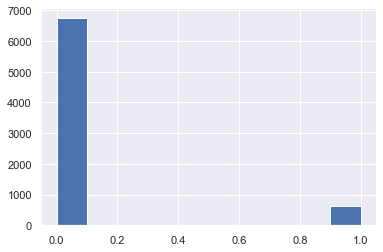

In [27]:
df.sold_out.hist()

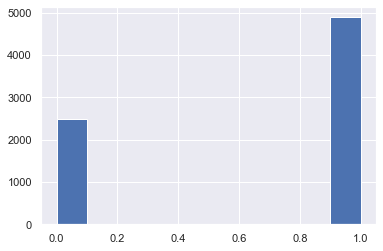

In [28]:
df.is_presale.hist()

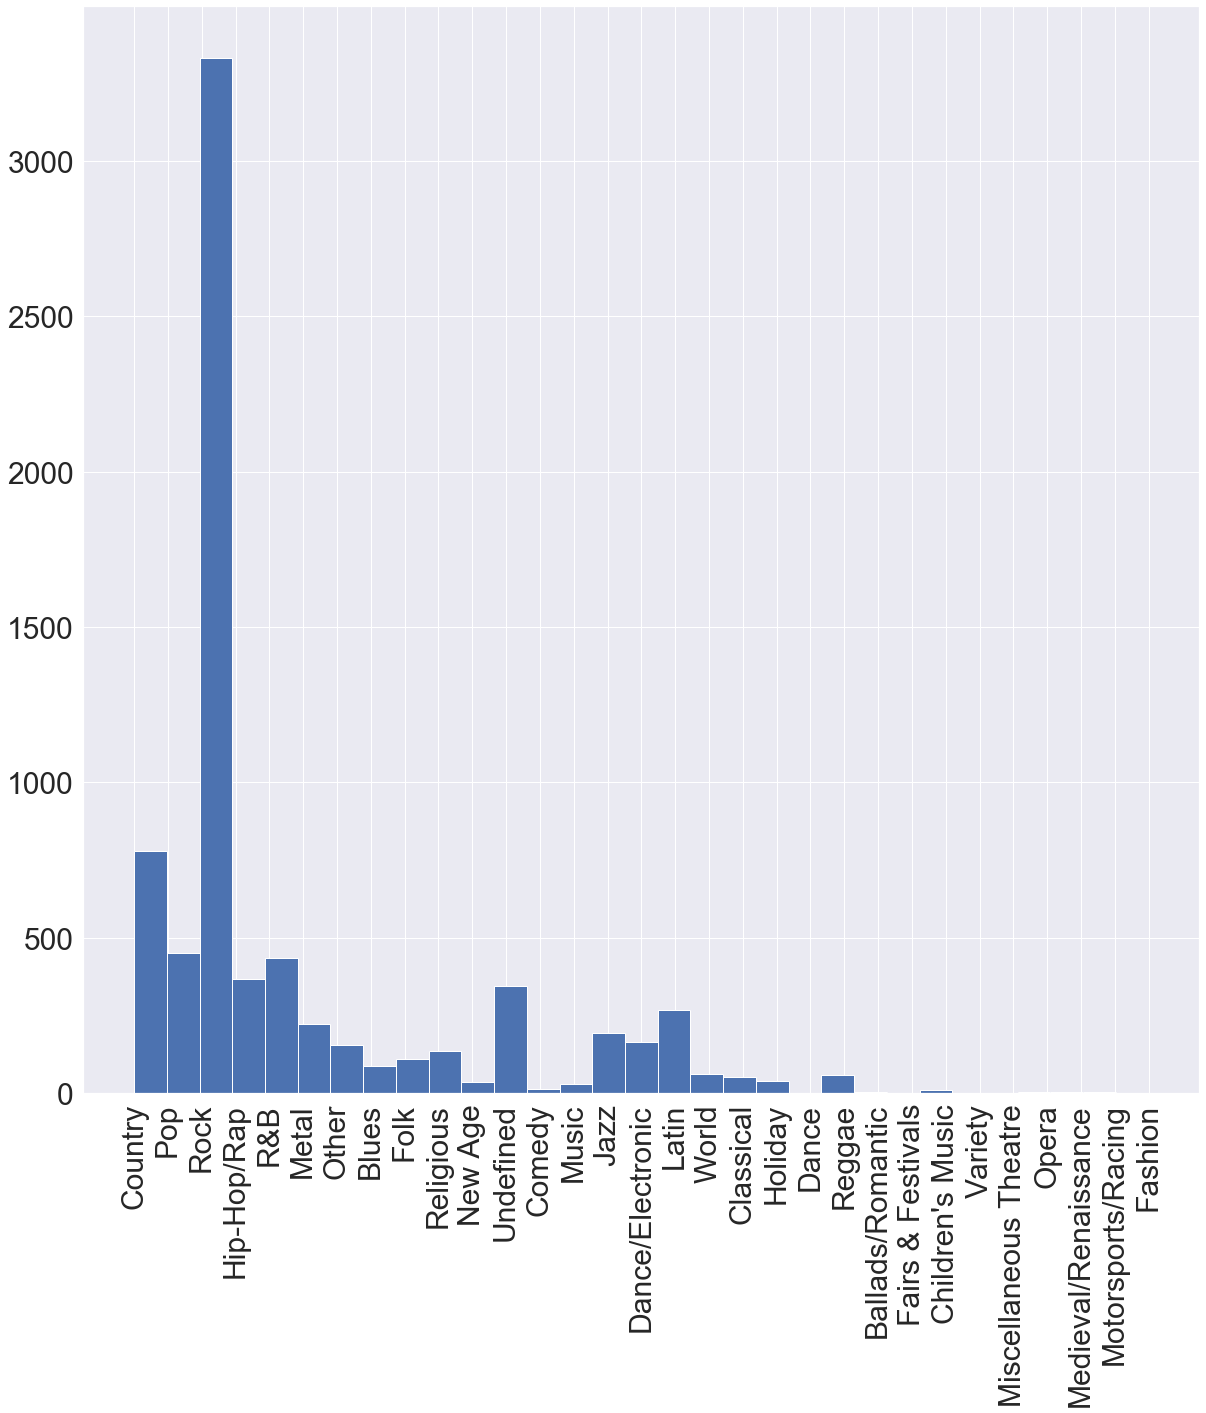

In [29]:
df.genre.hist(figsize=(20,20),xrot=90,bins=31,xlabelsize=30,ylabelsize=30)

In [30]:
df.columns

Index(['address', 'city', 'country', 'event_date', 'event_name', 'genre',
       'is_presale', 'latitude_left', 'longitude_left', 'max_tickets',
       'num_markets', 'onsale_date', 'postalCode', 'price_max', 'price_min',
       'sold_out', 'state', 'subgenre', 'url', 'venue_name_left', 'popularity',
       'headliner', 'support', 'event_time', 'id_y', 'capacity', 'street',
       'zip', 'metro_area'],
      dtype='object')

In [31]:
df.reset_index(inplace=True)

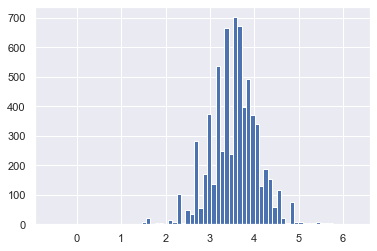

In [32]:
df.price_min.apply(lambda x: np.log(x)).hist(bins=70)

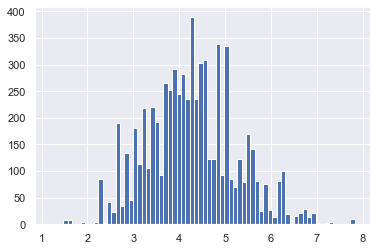

In [33]:
df.price_max.apply(lambda x: np.log(x)).hist(bins=70)

In [34]:
import sklearn
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import patsy
from sklearn.metrics import accuracy_score, roc_auc_score

In [35]:
dummy_df = pd.get_dummies(df)

In [36]:
X = dummy_df.drop(columns= ['sold_out'])

In [37]:
y = dummy_df['sold_out']

In [38]:
train_x, test_x, train_y, test_y = train_test_split(X,y, random_state=42)

In [39]:
baseline = DummyClassifier()

In [40]:
baseline.fit(train_x, train_y)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [41]:
y_pred = baseline.predict(test_x)

In [42]:
accuracy_score(test_y,y_pred)

0.8327016783974012

In [43]:
roc_auc_score(test_y,y_pred)

0.49275567469162795

In [82]:
from tpot import TPOTClassifier

In [ ]:
tpot = TPOTClassifier(generations=8, population_size=50, verbosity=2)
tpot.fit(train_x, train_y)
print("Accuracy is {}%".format(tpot.score(X_test, y_test)*100))

Imputing missing values in feature set


In [48]:
sg_df = pd.read_csv('sg_events.csv')

In [49]:
sg_df.columns

Index(['Unnamed: 0', 'created_at', 'datetime_local', 'general_admission', 'id',
       'popularity', 'score', 'short_title', 'url', 'listing_count',
       'average_price', 'median_price', 'lowest_price', 'venue_name',
       'venue_popularity', 'venue_address', 'venue_city', 'venue_state',
       'venue_zip', 'venue_id'],
      dtype='object')

In [51]:
sg_df = sg_df[['short_title','average_price', 'median_price', 'lowest_price', 'venue_name',
       'venue_popularity','general_admission','popularity', 'score']]

In [53]:
sg_df.shape

(10833, 9)

In [56]:
sg_df.dropna(inplace=True)

In [57]:
df.columns

Index(['genre', 'is_presale', 'max_tickets', 'num_markets', 'onsale_date',
       'price_max', 'price_min', 'sold_out', 'subgenre', 'venue_name_left',
       'popularity', 'headliner', 'support', 'event_time', 'metro_area'],
      dtype='object')

In [58]:
sg_df.columns

Index(['short_title', 'average_price', 'median_price', 'lowest_price',
       'venue_name', 'venue_popularity', 'general_admission', 'popularity',
       'score'],
      dtype='object')

In [60]:
df_merge = fuzzymatcher.fuzzy_left_join(df, sg_df,left_on=['venue_name_left','headliner'], right_on=['venue_name','short_title'])

In [63]:
df_merge.isnull().sum()

best_match_score       3
__id_left              0
__id_right             3
genre                  0
is_presale             0
max_tickets            0
num_markets            1
onsale_date           43
price_max            624
price_min            624
sold_out               0
subgenre               0
venue_name_left        0
popularity_left        0
headliner              0
support                0
event_time           301
metro_area             0
short_title            3
average_price          3
median_price           3
lowest_price           3
venue_name             3
venue_popularity       3
general_admission      3
popularity_right       3
score                  3
dtype: int64

In [64]:
df_merge.to_csv('merged_df_done.csv')

In [152]:
df_merge = pd.read_csv('merged_df_done.csv')

In [153]:
df_merge.drop(columns=['price_max','price_min'],inplace=True)

In [154]:
df_merge.dropna(subset=['venue_name'],inplace=True)

In [155]:
df.columns

Index(['genre', 'is_presale', 'max_tickets', 'num_markets', 'onsale_date',
       'price_max', 'price_min', 'sold_out', 'subgenre', 'venue_name_left',
       'popularity', 'headliner', 'support', 'event_time', 'metro_area'],
      dtype='object')

In [156]:
df_merge.dropna(subset=['num_markets'],inplace=True)

In [157]:
df_merge.columns

Index(['Unnamed: 0', 'best_match_score', '__id_left', '__id_right', 'genre',
       'is_presale', 'max_tickets', 'num_markets', 'onsale_date', 'sold_out',
       'subgenre', 'venue_name_left', 'popularity_left', 'headliner',
       'support', 'event_time', 'metro_area', 'short_title', 'average_price',
       'median_price', 'lowest_price', 'venue_name', 'venue_popularity',
       'general_admission', 'popularity_right', 'score'],
      dtype='object')

In [158]:
df_merge.drop(columns=['__id_left', '__id_right'],inplace=True)

In [159]:
df_merge.isnull().sum()

Unnamed: 0             0
best_match_score       0
genre                  0
is_presale             0
max_tickets            0
num_markets            0
onsale_date           43
sold_out               0
subgenre               0
venue_name_left        0
popularity_left        0
headliner              0
support                0
event_time           300
metro_area             0
short_title            0
average_price          0
median_price           0
lowest_price           0
venue_name             0
venue_popularity       0
general_admission      0
popularity_right       0
score                  0
dtype: int64

In [160]:
df_merge.drop(columns=['event_time'],inplace=True)

In [161]:
train_df = df_merge.drop(columns=['onsale_date'])

In [163]:
train_df.isnull().sum()

Unnamed: 0           0
best_match_score     0
genre                0
is_presale           0
max_tickets          0
num_markets          0
sold_out             0
subgenre             0
venue_name_left      0
popularity_left      0
headliner            0
support              0
metro_area           0
short_title          0
average_price        0
median_price         0
lowest_price         0
venue_name           0
venue_popularity     0
general_admission    0
popularity_right     0
score                0
dtype: int64

In [165]:
train_df = train_df.drop(columns= ['Unnamed: 0'])

In [166]:
train_df.to_csv('training_df.csv')

In [146]:
X = train_df.drop(columns=['sold_out'])
y= train_df.sold_out

In [147]:
train_x, test_x, train_y, test_y = train_test_split(X,y, random_state=42)

In [144]:
train_df = pd.get_dummies(train_df)

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)